In [6]:
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [7]:
# 1. Import dataset and display first 5 rows
df.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [15]:
# 2. Check column data types
df.dtypes

TV       float64
Sales    float64
dtype: object

In [19]:
# 3. Check the shape of the Data Frame (rows, columns)
print(df.shape[0])
print(df.shape[1])

200
2


In [20]:
# 4. Look at summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


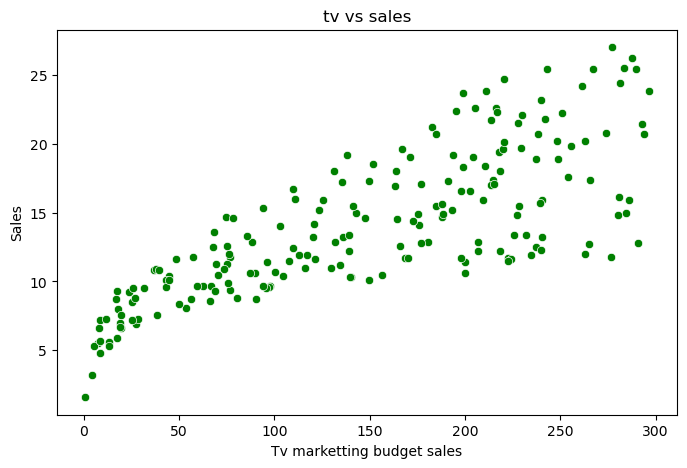

In [29]:
# 5. Visualize the relationship between the features and the dependent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["TV"],y=df["Sales"],color="green")
plt.xlabel("Tv marketting budget sales")
plt.ylabel("Sales")
plt.title("tv vs sales")
plt.show()

In [43]:
# 6. Prepare X (feature variables) and y (response variable)
x=df[["TV"]] #independent
y=df["Sales"] # dependent


In [42]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_tes
from sklearn.model_selection import train_test_split

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (140, 1)
X_test shape: (60, 1)
y_train shape: (140,)
y_test shape: (60,)


In [44]:
# 8. Print the shape of train data and test data
# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (140, 1)
X_test shape: (60, 1)
y_train shape: (140,)
y_test shape: (60,)


In [45]:
# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values

import numpy as np

# Compute slope (m) and intercept (b) manually
n = len(X_train)
sum_x = np.sum(X_train)
sum_y = np.sum(y_train)
sum_xy = np.sum(X_train.values.flatten() * y_train.values)
sum_x2 = np.sum(X_train.values.flatten() ** 2)

# Formula for slope (m)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

# Formula for intercept (b)
b = (sum_y - m * sum_x) / n

# Print coefficients
print("Manually Calculated Coefficients:")
print("Slope (m):", m)
print("Intercept (b):", b)


Manually Calculated Coefficients:
Slope (m): TV    0.046408
dtype: float64
Intercept (b): TV    7.23946
dtype: float64


In [46]:
# 10.Create the model using the calculated coefficients and make predictions on the testing set
# Making predictions using manually computed regression equation
y_pred_manual = m * X_test + b

# Display first few predictions
print(y_pred_manual.head())


            TV
95   14.817854
15   16.307544
30   20.832305
158   7.782431
128  17.463099


In [47]:
# 11.Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print coefficients
print("Sklearn Model Coefficients:")
print("Intercept:", model.intercept_)
print("Slope (Coefficient for TV):", model.coef_[0])


Sklearn Model Coefficients:
Intercept: 7.239459830751138
Slope (Coefficient for TV): 0.046407802128152764


In [48]:
# 12.Print the intercept and coefficients
# Print intercept and coefficient from sklearn model
print("Intercept:", model.intercept_)
print("Coefficient for TV:", model.coef_[0])


Intercept: 7.239459830751138
Coefficient for TV: 0.046407802128152764


In [49]:
# 13.Make predictions on the testing set - y_pred
# Predict sales using the test data
y_pred = model.predict(X_test)

# Display first few predictions
print("Predicted Sales for Test Data:", y_pred[:5])


Predicted Sales for Test Data: [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


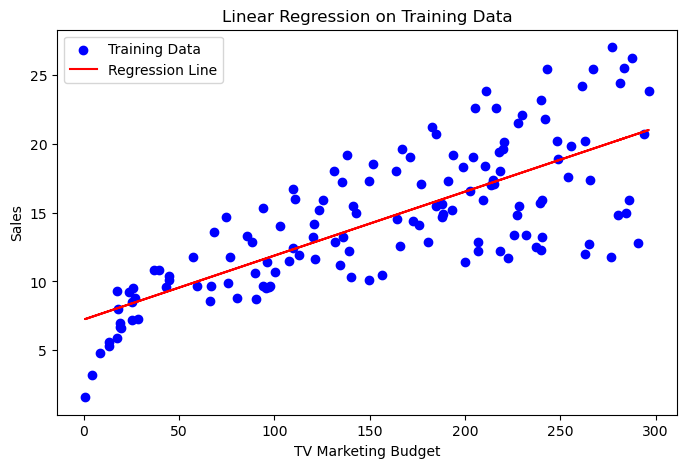

In [51]:
# 14.Plot train data and the model
# Plot training data with regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label="Training Data", color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression on Training Data")
plt.legend()
plt.show()


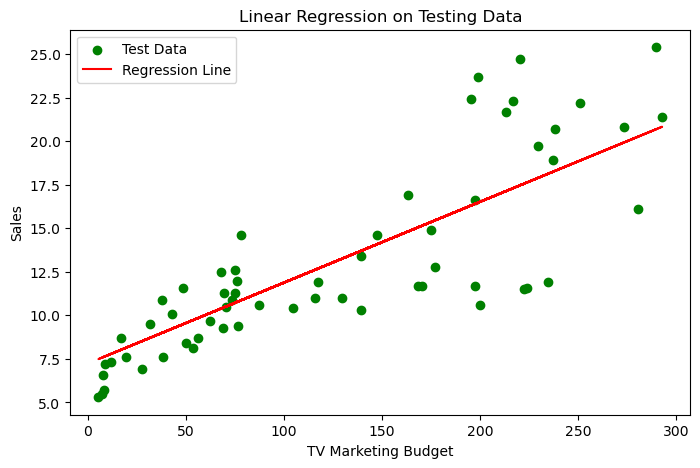

In [52]:
# 15.Plot test data and the model
# Plot test data with regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Test Data", color='green')
plt.plot(X_test, model.predict(X_test), color='red', label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression on Testing Data")
plt.legend()
plt.show()


In [53]:
# 16.Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute R² score
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 8.970991242413614
R² Score: 0.6714477229302764


In [54]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library
import numpy as np

# Compute R² manually
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)  # Total sum of squares
ss_residual = np.sum((y_test - y_pred) ** 2)  # Residual sum of squares
r2_manual = 1 - (ss_residual / ss_total)

# Compute Adjusted R² manually
n = len(y_test)  # Number of data points
p = 1  # Number of predictors (TV)
r2_adj_manual = 1 - (1 - r2_manual) * (n - 1) / (n - p - 1)

# Print R² and Adjusted R²
print("Manually Calculated R²:", r2_manual)
print("Manually Calculated Adjusted R²:", r2_adj_manual)


Manually Calculated R²: 0.6714477229302764
Manually Calculated Adjusted R²: 0.6657830284980398
